In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(10,10)})

# Problem 4: Central Limit Theorem

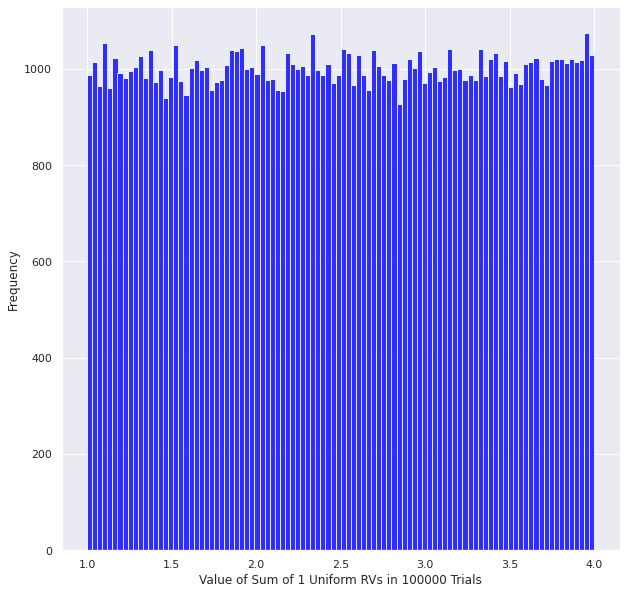

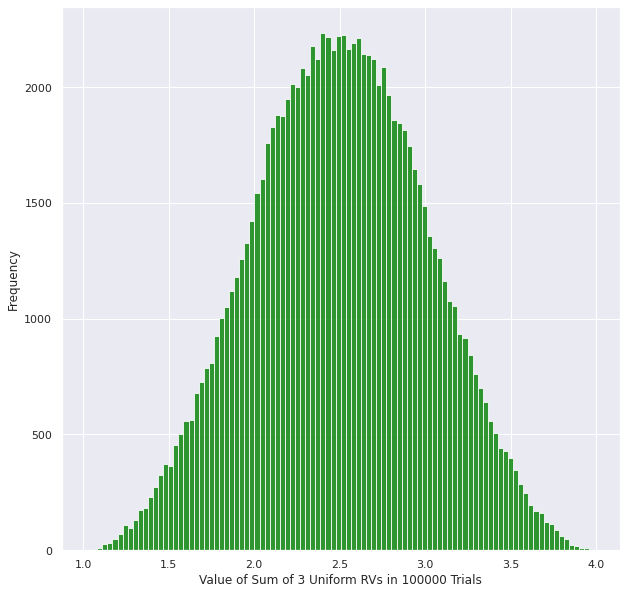

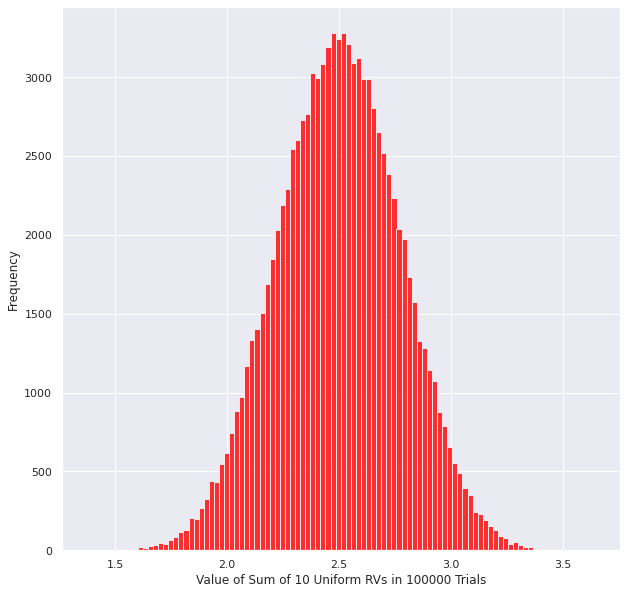

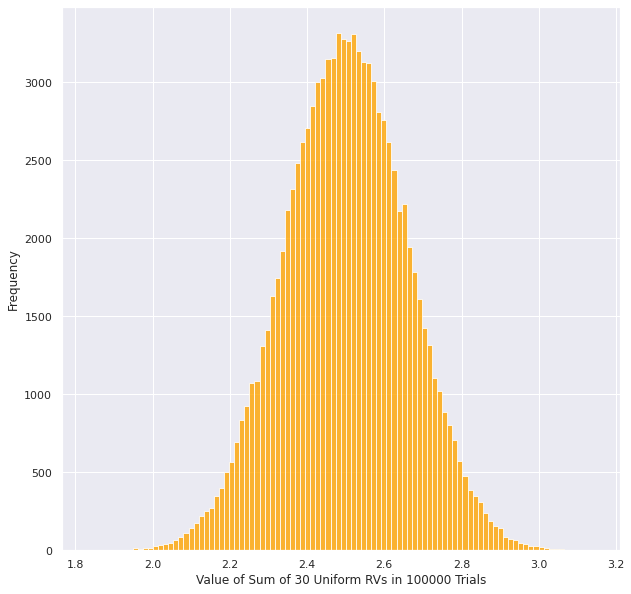

In [12]:
n_vec = [1, 3, 10, 30]
n_trials = 100000

colors = ['blue', 'green', 'red', 'orange']

def get_xi():
    return np.random.uniform(1, 4)

for n in n_vec:
    sums = []
    
    for i in range(0, n_trials):
        
        values = []
        
        for j in range(0, n):
            value = get_xi()
            values.append(value)

        sums.append(np.sum(values)/n)
        
    plt.figure()

    ax = sns.distplot(sums,
              bins=100,
              label="n={}".format(n),
              kde=False,
              color=colors[n_vec.index(n)],
              hist_kws={"linewidth": 1,'alpha':0.8})
    ax.set(xlabel='Value of Sum of {} Uniform RVs in {} Trials'.format(n, n_trials), ylabel='Frequency')
    #ax.legend()
    

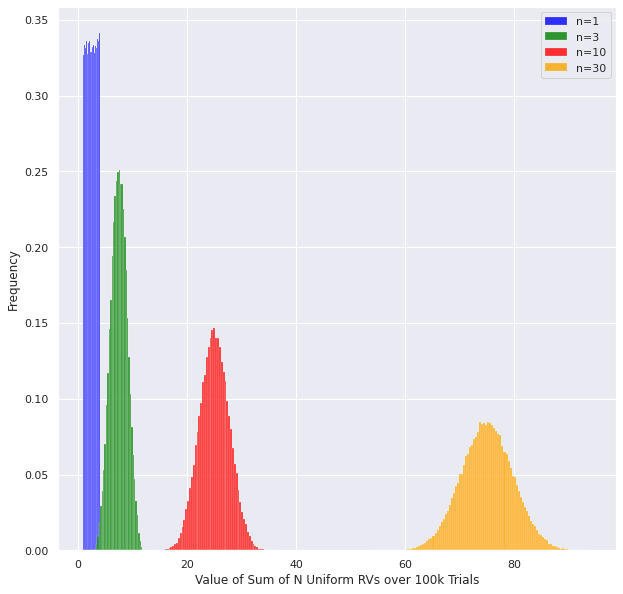

In [84]:
n_vec = [1, 3, 10, 30]
n_trials = 100000

colors = ['blue', 'green', 'red', 'orange']

def get_xi():
    return np.random.uniform(1, 4)

sums_list = []

for n in n_vec:
    sums = []
    
    for i in range(0, n_trials):
        
        values = []
        
        for j in range(0, n):
            value = get_xi()
            values.append(value)

        sums.append(np.sum(values))
        
    #plt.figure()
    sums_list.append(sums)

    ax = sns.distplot(sums,
              bins=int(20*np.sqrt(n)),
              hist=True,
              label="n={}".format(n),
              kde=False,
              color=colors[n_vec.index(n)],
              hist_kws={"linewidth": 0.25,'alpha': 0.8, "density": True})
    ax.set(xlabel='Value of Sum of N Uniform RVs over {}k Trials'.format(int(n_trials/1000)), ylabel='Frequency')
    ax.legend()

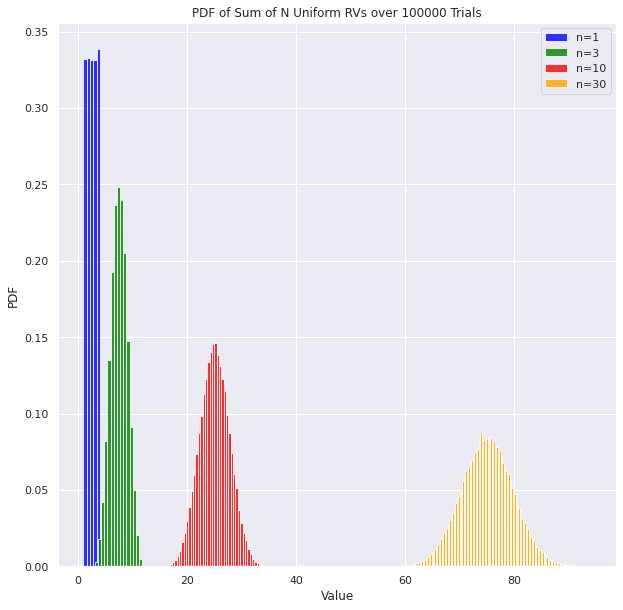

In [88]:
#Doing the same thing using matplotlib and pandas
df = pd.DataFrame(sums_list)
df = df.transpose()
df.columns = n_vec

for n in n_vec:
    #hist, bin_edges = np.histogram(df[n], bins=1000, density=True)
    #plt.figure()
    nn, bins, patches = plt.hist(df[n],
                                int(5*n), #scale the number of bins based on how close together they'll be
                                density=True,
                                facecolor=colors[n_vec.index(n)],
                                alpha=0.8,
                                label="n={}".format(n))
    plt.xlabel("Value")
    plt.ylabel("PDF")
    plt.title('PDF of Sum of N Uniform RVs over {} Trials'.format(n_trials))
    
plt.legend()